In [1]:
import sys
sys.path.append('../src')

from module.module import Linear, Conv1D, MaxPool1D, Flatten
from module.activation import TanH, Sigmoide, ReLU

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.processing import one_hot_y
from utils.plots import plot_net

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [3]:
X = data["X_train"]
y = data["Y_train"]

X_test = data["X_test"]
y_test = data["Y_test"]

In [4]:
classes = len(np.unique(y))

input_neurons = X.shape[1]
output_neurons = classes

In [5]:
y_one_hot = one_hot_y(y, classes)

In [11]:
y_one_hot.shape

(6229, 10)

In [6]:
X_conv = X[:,:,np.newaxis]

In [7]:
X_conv.shape

(6229, 256, 1)

100%|██████████| 20/20 [02:08<00:00,  6.42s/it]


Training completed.


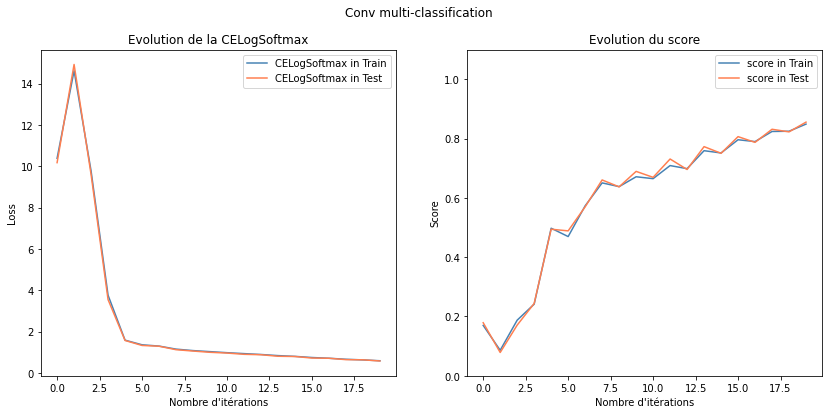

In [13]:
net_500_ep = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=1, init="xavier"),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(4064, 100, init="xavier"),
    ReLU(),
    Linear(100, 10, init="xavier"),
], classes_type="multi")

optim_500_ep = Optim(net_500_ep, CELogSoftmax(), eps=1e-5)
optim_500_ep.SGD(X_conv, y_one_hot, test_train_split=True, batch_size=len(X_conv), epochs=500, verbose=False)

plot_net(optim_500_ep, X_conv, y_one_hot, net_type="multiclass", net_title="Conv multi-classification")

In [ ]:
net_eps = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=1, init="xavier"),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(4064, 100, init="xavier"),
    ReLU(),
    Linear(100, 10, init="xavier"),
], classes_type="multi")

optim_eps = Optim(net_eps, CELogSoftmax(), eps=1e-5)
optim_eps.SGD(X_conv, y_one_hot, test_train_split=True, batch_size=200, epochs=500, verbose=False)

plot_net(optim_eps, X_conv, y_one_hot, net_type="multiclass", net_title="Conv multi-classification")